# Occurrence of the tropical fish family Chaetodontidae ('Butterflyfish') along the southeast coast of Australia.
#### Sampling data from 12 voyages around Australia since 1983. Full data catalogue available at: 
- https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/8e754b8b-c40f-4a21-ae82-573a67fc3556

#### References used for this notebook: 
- Smith, James A., Anthony G. Miskiewicz, Lynnath E. Beckley, Jason D. Everett, Valquíria Garcia, Charles A. Gray, David Holliday, Alan R. Jordan, John Keane, Ana Lara-Lopez, Jeffrey M. Leis, Paloma A. Matis, Barbara A. Muhling, Francisco J. Neira, Anthony J. Richardson, Kimberley A. Smith, Kerrie M. Swadling, Augy Syahailatua, Matthew D. Taylor, Paul D. van Ruth, Tim M. Ward, and Iain M. Suthers. 2018. “Data Descriptor: A Database of Marine Larval Fish Assemblages in Australian Temperate and Subtropical Waters.” Scientific Data 5:1–8. doi: 10.1038/sdata.2018.207.

<div class="alert alert-block alert-info">
<b>Step One:</b> Download and then open IMOS csv file.
</div>

Install python libraries

In [1]:
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

Load datafile

In [2]:
df = pd.read_csv('IMOS_-_Larval_Fish_Sub-Facility_-_Database_of_Marine_Larval_Fish_Assemblages_in_Australian_temperate_and_subtropical_waters_(1983_-_ongoing).csv')
df.head()

/tmp/ipykernel_45/100283998.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IMOS_-_Larval_Fish_Sub-Facility_-_Database_of_Marine_Larval_Fish_Assemblages_in_Australian_temperate_and_subtropical_waters_(1983_-_ongoing).csv')


,Project,StationName,Latitude,Longitude,TripCode,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,...,Trichiuridae_Lepidopus.caudatus_37440002,Trichiuridae_other_37440000,Trichonotidae_Trichonotus.spp_37394901,Triglidae_Lepidotrigla.papilio_37288002,Triglidae_Lepidotrigla.spp_37288901,Triglidae_other_37288000,Tripterygiidae_37415000,Uranoscopidae_37400000,Xiphiidae_Xiphias.gladius_37442001,Zeidae_37264906
0,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T15:09:00Z,25/1/1994 1:09,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
1,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T14:59:00Z,25/1/1994 0:59,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T14:49:00Z,25/1/1994 0:49,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NIMO_Franklin_94,Bondi-B6,-33.9583,151.3333,FR 02/94,1994-01-25T12:04:00Z,25/1/1994 22:04,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NIMO_Franklin_94,Bondi-B5,-33.9583,151.3333,FR 02/94,1994-01-25T11:50:00Z,25/1/1994 21:50,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot the amount of Chaetodontidae collected on each station

<AxesSubplot:xlabel='StationName'>

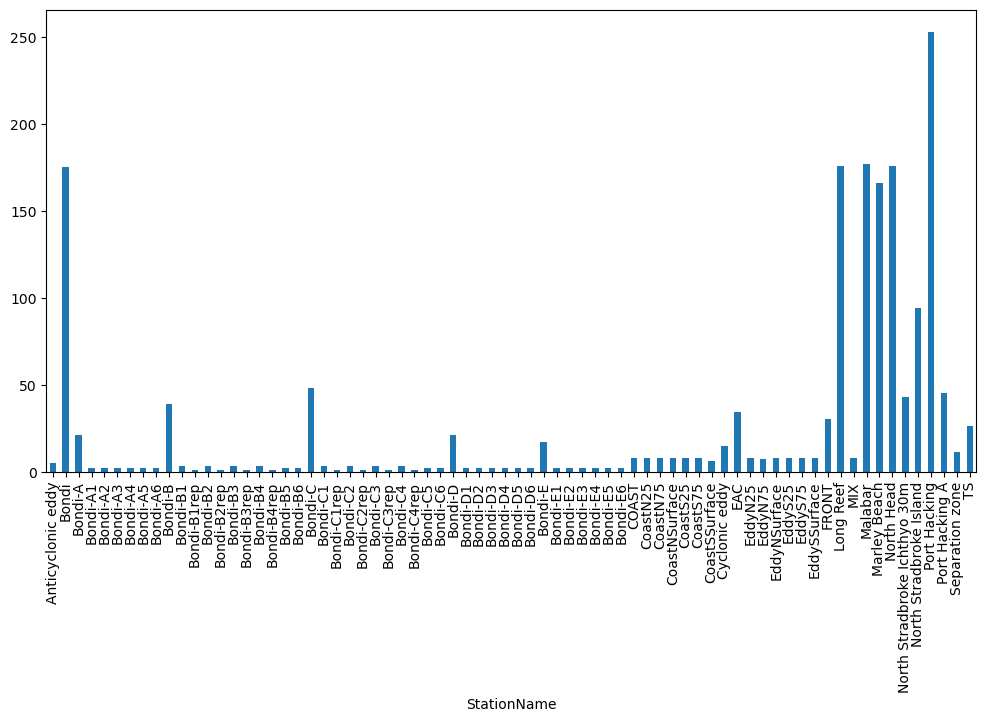

In [3]:
df.groupby('StationName').Chaetodontidae_37365900.count().plot(kind='bar', figsize=(12,6))

Count the amount of Chaetodontidae detected at each station

In [4]:
mystat = df.groupby('StationName').Chaetodontidae_37365900.count()
mystat

StationName
Anticyclonic eddy            5
Bondi                      175
Bondi-A                     21
Bondi-A1                     2
Bondi-A2                     2
                          ... 
North Stradbroke Island     94
Port Hacking               253
Port Hacking A              45
Separation zone             11
TS                          26
Name: Chaetodontidae_37365900, Length: 72, dtype: int64

Group the data by station name

In [5]:
grpstat = df.groupby('StationName')

Create function for the location of each station

In [6]:
def extractStationInfo(stationName):
    lat = grpstat.get_group(stationName).Latitude.values[0]
    lon = grpstat.get_group(stationName).Longitude.values[0]
    depth = grpstat.get_group(stationName).Bathymetry_m.values[0]
    
    return [stationName,lat,lon,depth]

Extract the location of each station

In [7]:
mystation = []
for k in range(len(mystat)):
    stationName = mystat.index[k]
    mystation.append(extractStationInfo(stationName))
mystation

[['Anticyclonic eddy', -35.3625, 150.8502, nan],
 ['Bondi', -33.9, 151.417, 60.0],
 ['Bondi-A', -33.945, 151.2917, 67.0],
 ['Bondi-A1', -33.945, 151.2917, 67.0],
 ['Bondi-A2', -33.945, 151.2917, 67.0],
 ['Bondi-A3', -33.945, 151.2917, 67.0],
 ['Bondi-A4', -33.945, 151.2917, 67.0],
 ['Bondi-A5', -33.945, 151.2917, 67.0],
 ['Bondi-A6', -33.945, 151.2917, 67.0],
 ['Bondi-B', -33.9583, 151.3333, 83.0],
 ['Bondi-B1', -33.9583, 151.3333, 83.0],
 ['Bondi-B1rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B2', -33.9583, 151.3333, 83.0],
 ['Bondi-B2rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B3', -33.9583, 151.3333, 83.0],
 ['Bondi-B3rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B4', -33.9583, 151.3333, 83.0],
 ['Bondi-B4rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B5', -33.9583, 151.3333, 83.0],
 ['Bondi-B6', -33.9583, 151.3333, 83.0],
 ['Bondi-C', -33.95, 151.4433, 130.0],
 ['Bondi-C1', -33.95, 151.4433, 130.0],
 ['Bondi-C1rep', -33.95, 151.4433, 130.0],
 ['Bondi-C2', -33.95, 151.4433, 130.0],
 ['Bondi-C2rep

<div class="alert alert-block alert-info">
<b>Step Two:</b> Plot the stations where Chaetodontidae ('Butterflyfish') have been found.
</div>

Import the background map and plot the station location

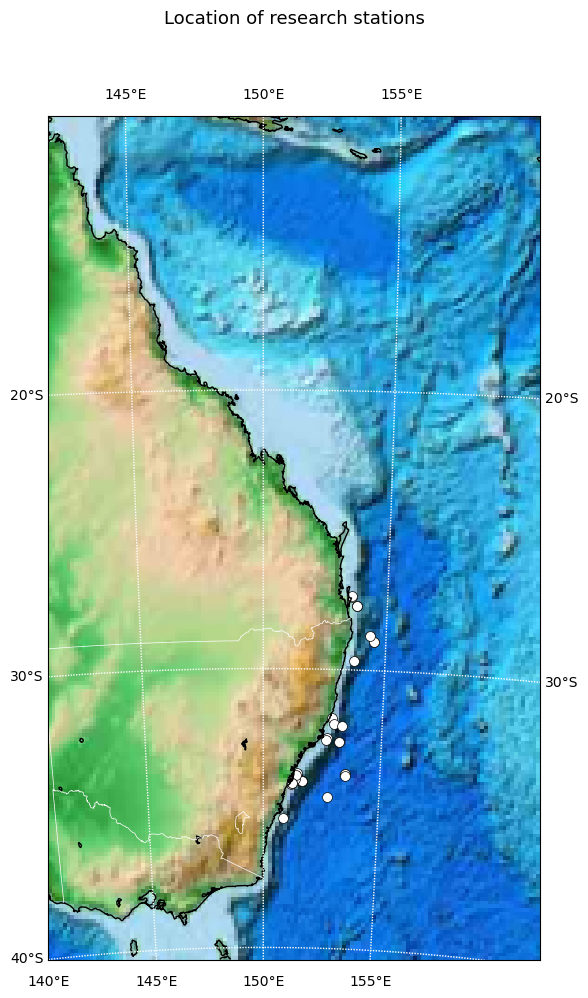

<Figure size 1200x700 with 0 Axes>

In [8]:
# plt.figure(figsize=(9,10))
m = Basemap(llcrnrlon=140, llcrnrlat=-40, urcrnrlon=160, urcrnrlat=-10,
             resolution='i', projection='tmerc', lat_0 = -20, lon_0 = 150)
# m.bluemarble()
# m.shadedrelief()
m.etopo(scale=0.5) #, alpha=0.5)
m.drawcoastlines(color='black')
m.drawparallels(np.arange(-40,-10,10),labels=[1,1,0,0], color='white')
m.drawmeridians(np.arange(140.0, 160.0, 5.),labels=[0,0,1,1], color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')

# Title
plt.title('Location of research stations',
          fontsize=13,x=0.5, y=1.1
         )
    

for k in range(len(mystation)):
    x, y = m(mystation[k][2],mystation[k][1])  # transform coordinates
    plt.scatter(x, y, marker='o', color='white', s=50, edgecolors='k', lw=0.5) 
#     plt.scatter(mystation[k][2],mystation[k][1],edgecolors='white',s=500)
    
plt.tight_layout()
plt.show()
plt.clf()

<div class="alert alert-block alert-info">
<b>Step Three:</b> Plot the relative abundance of Chaetodontidae ('Butterflyfish') at each station.
</div>

Plot the relative abundance of butterflyfish on each station (n.b. abundance proportional to the shade and size of marker)

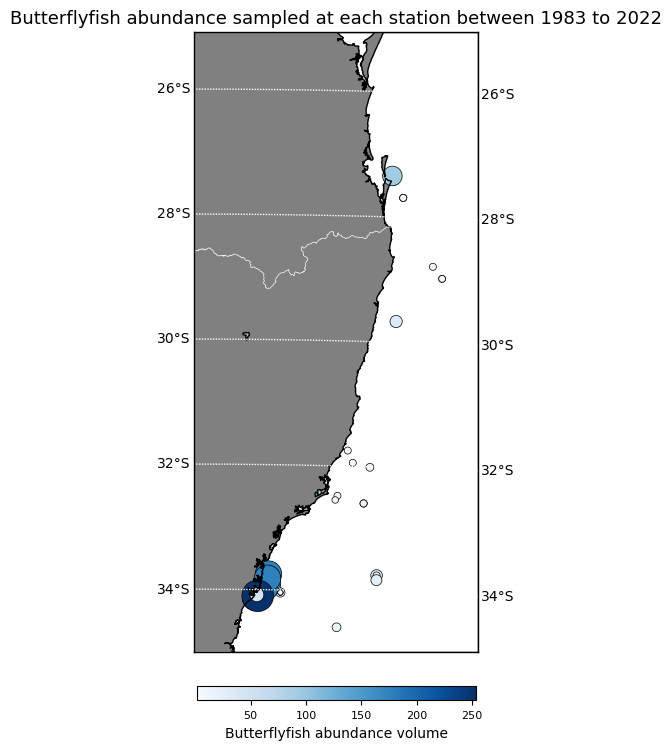

In [12]:
plt.figure(figsize=(9,10))
m = Basemap(llcrnrlon=150, llcrnrlat=-35, urcrnrlon=155, urcrnrlat=-25,
             resolution='h', projection='tmerc', lat_0 = -20, lon_0 = 150)
# m.bluemarble()
# m.shadedrelief()
# m.etopo(scale=0.8) #, alpha=0.5)
m.drawcoastlines(color='black')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='gray',lake_color='lightblue')

m.drawparallels(np.arange(-40,-10,2),labels=[1,1,0,0], color='white')
m.drawmeridians(np.arange(150.0, 150.0, 2.),labels=[0,0,1,1], color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')
#start drawing on the map#
mx = []
my = []
for k in range(len(mystation)):
    x, y = m(mystation[k][2],mystation[k][1])  # transform coordinates
    mx.append(x)
    my.append(y)
    
    
# Title
plt.title('Butterflyfish abundance sampled at each station between 1983 to 2022',
          fontsize=13
         )
    
# mx, my = m(mystation[:][2],mystation[:][1])  # transform coordinates
    
sc = plt.scatter(mx, my, marker='o', #color='white', 
            s=mystat.values*2+10, 
            edgecolors='k', lw=0.5,
            c=mystat.values, cmap='Blues' #, vmin=100, vmax=250
           ) 
#     plt.scatter(mystation[k][2],mystation[k][1],edgecolors='white',s=500)
cbar = plt.colorbar(sc, shrink=0.4, pad=0.045,orientation="horizontal") 
cbar.set_label('Butterflyfish abundance volume',
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)


    
plt.show()

End.